In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,64.700127,135.818051,161.212928,187.169525,269.989699


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

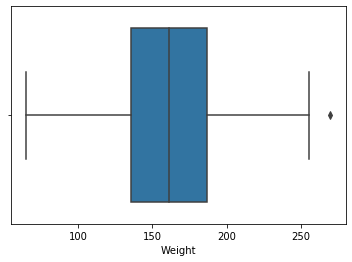

In [9]:
sns.boxplot(df.Weight)
plt.show()

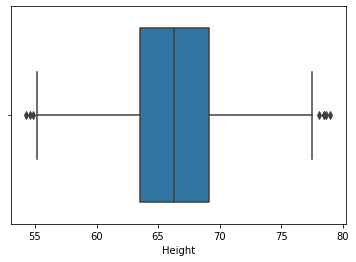

In [10]:
sns.boxplot(df.Height)
plt.show()

In [11]:
q1 = df['Weight'].quantile(0.25)
q3 = df['Weight'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr
ll = q3 - 1.5*iqr
df = df[(df.Weight >= ll) & (df.Weight <= ul)]

In [12]:
q1 = df['Height'].quantile(0.25)
q3 = df['Height'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr
ll = q3 - 1.5*iqr
df = df[(df.Height >= ll) & (df.Height <= ul)]

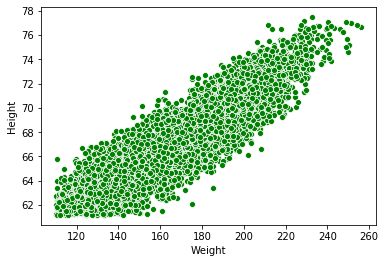

In [14]:
sns.scatterplot(df.Weight,df.Height,color='g')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = pd.DataFrame(df['Weight'])
y = pd.DataFrame(df['Height'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6309, 1) (6309, 1) (2705, 1) (2705, 1)


In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [19]:
print(lr.coef_)
print(lr.intercept_)

[[0.10514551]]
[49.50882065]


In [20]:
r2_score(y_test, y_pred)

0.8228596756773269

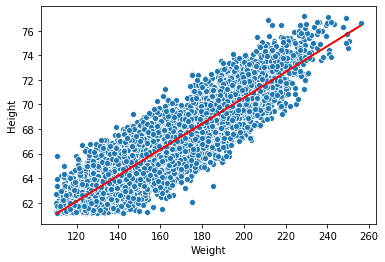

In [21]:
sns.scatterplot(X_train.Weight, y_train.Height)
plt.plot(X_train.Weight, lr.predict(X_train), c='r')
plt.show()

In [22]:
residual = y_test - y_pred

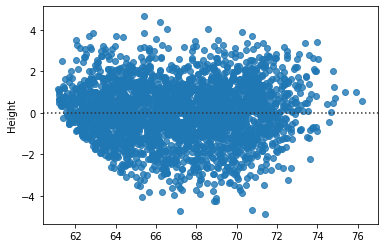

In [23]:
sns.residplot(y_pred, residual)
plt.show()

In [24]:
import pylab

In [25]:
import scipy.stats as stats

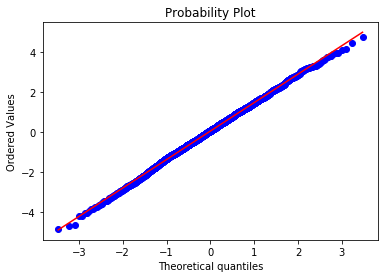

In [26]:
stats.probplot(residual.Height,plot=pylab)
plt.show()

In [27]:
test, pvalue = stats.shapiro(residual)
print(pvalue)

0.24791443347930908


In [28]:
df[['Female','Male']]=pd.get_dummies(df['Gender'])
df.head()

,Gender,Height,Weight,Female,Male
0,Male,73.847017,241.893563,0,1
1,Male,68.781904,162.310473,0,1
2,Male,74.110105,212.740856,0,1
3,Male,71.730978,220.042470,0,1
4,Male,69.881796,206.349801,0,1


In [29]:
df.drop('Gender',axis=1,inplace=True)

In [30]:
df.head()

,Height,Weight,Female,Male
0,73.847017,241.893563,0,1
1,68.781904,162.310473,0,1
2,74.110105,212.740856,0,1
3,71.730978,220.042470,0,1
4,69.881796,206.349801,0,1


In [31]:
temp = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
temp.head()

,Height,Weight,Female,Male
0,2.033330,2.613122,-0.902246,0.902246
1,0.516665,-0.154016,-0.902246,0.902246
2,2.112107,1.599470,-0.902246,0.902246
3,1.399717,1.853350,-0.902246,0.902246
4,0.846010,1.377250,-0.902246,0.902246


In [33]:
X_l = temp.drop('Height',axis=1)
y_l = temp['Height']

In [34]:
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(X_l, y_l, test_size=0.3, random_state=32)
print(X_l_train.shape, y_l_train.shape, X_l_test.shape, y_l_test.shape)

(6309, 3) (6309,) (2705, 3) (2705,)


In [36]:
lr = LinearRegression()
lr.fit(X_l_train, y_l_train)
y_l_pred = lr.predict(X_l_test)

In [37]:
r2_score(y_l_test, y_l_pred)

0.8293623249918579